In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import numpy as np


In [2]:
def plot(image):
    plt.imshow(image,cmap='Greys')
    plt.axis('off')
    plt.show()
    


KIVABE EKTA LAYER ER EXTRACTED FEATURE VISSUALIZE KORE OTA DEKHA, FOR SIMPLICITY AMI CHATGPT ER CODE PASTING HERE 


To visualize the features extracted by individual filters in a convolutional layer, you can use various techniques to gain insights into what each neuron is detecting. Let's assume you're working with a convolutional neural network (CNN) using Keras. Here's a step-by-step approach:

1. **Model Architecture**: Make sure you have your model architecture set up, including the convolutional layers you're interested in.

2. **Extract Intermediate Layer Outputs**: You can use the Keras `Model` class to create a new model that outputs the activations of the specific layer you're interested in. This can be done as follows:

```python
from keras.models import Model

# Original model
original_model = ...  # Your complete model here

# Choose the layer you want to inspect
layer_name = 'conv2'  # Replace with the actual layer name

# Create a new model that outputs the activations of the chosen layer
intermediate_layer_model = Model(inputs=original_model.input,
                                 outputs=original_model.get_layer(layer_name).output)
```

3. **Get Activation for Specific Input**: To visualize the output of a single neuron for a specific input, you'll need to provide an input image to the model and obtain the corresponding activations:

```python
import numpy as np
from keras.preprocessing import image

# Load and preprocess a sample image
img_path = 'path_to_your_image.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size as needed
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Apply preprocessing specific to your model

# Get activations
activations = intermediate_layer_model.predict(img_array)
```

4. **Visualize Activations**: Now that you have the activations, you can visualize them. One common approach is to use heatmap visualization to highlight regions that activated the specific neuron. There are several libraries you can use, such as `matplotlib` or specialized visualization libraries like `tf-explain`. Here's an example using `matplotlib`:

```python
import matplotlib.pyplot as plt

# Choose the index of the filter/neuron you want to visualize
filter_index = 0  # Replace with the index of the neuron you want to visualize

# Get the activations for the specific neuron/filter
filter_activation = activations[0, :, :, filter_index]

# Normalize the activation values
filter_activation -= filter_activation.mean()
filter_activation /= filter_activation.std() + 1e-5
filter_activation *= 0.1

# Clip values to the [0, 1] range
filter_activation = np.clip(filter_activation, 0, 1)

# Plot the heatmap
plt.matshow(filter_activation, cmap='viridis')
plt.show()
```

This code will display a heatmap where the brighter regions indicate higher activation for the chosen neuron/filter.

Remember, interpreting activations can be challenging, and the exact patterns learned by neurons might not always be directly interpretable by humans. However, these visualizations can give you insights into what each neuron is sensitive to within the input data.

In [20]:
from keras.layers import Dropout
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1) ,name='conv_1'))
# POOL_1: downsample the image to choose the best features 
model.add(MaxPooling2D(pool_size=(2, 2),name='pool_1'))

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64, (3, 3),padding='same', activation='relu',name='conv_2'))
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2) ))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten(name='flatten'))

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu',name='fc_1'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax',name='fc_2'))

model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 fc_1 (Dense)                (None, 64)                200768    
                                                      

In [21]:
model.load_weights(filepath=r'C:\Users\defaultuser0.LAPTOP-LRB3T941\OneDrive\Documents\Tensorflow\MODEL WEIGHTS\MNIST\model.weirghts.best_v2.hdf5')

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [5]:
from keras.datasets import mnist
data=mnist.load_data()
(xtrain,ytrain),(xtest,ytest)=data

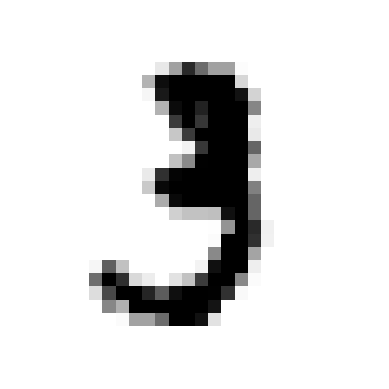

In [6]:
import matplotlib.pyplot as plt 
plot(xtrain[10])

In [7]:
xtrain=xtrain.reshape(-1,28,28,1)

In [8]:
x=model.predict(np.expand_dims(xtrain[10],axis=0))

1/1 [==============================] - 0s 245ms/step


In [9]:
x
np.argmax(x,axis=1)

array([3], dtype=int64)

In [10]:
def predicter(i,plot=True):
    
    x=model.predict(np.expand_dims(xtrain[i],axis=0))
    x= np.argmax(x,axis=1)   
    if plot:
        plt.xlabel(f'True Value is {ytrain[i]}')
        plt.ylabel(f'model predicted {x}')
        plt.imshow(xtrain[i],cmap='Greys')
        plt.show()
    #plt.text(20, 33, 'Point B', fontsize=12, ha='center')

    return [x,x==ytrain[i]] 

1/1 [==============================] - 0s 34ms/step


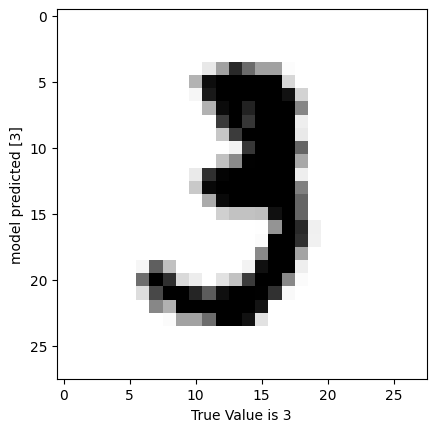

[array([3], dtype=int64), array([ True])]

In [11]:
h=predicter(10)
h

1/1 [==============================] - 0s 39ms/step


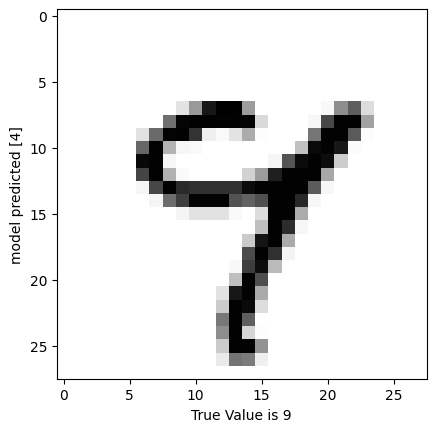

1/1 [==============================] - 0s 33ms/step


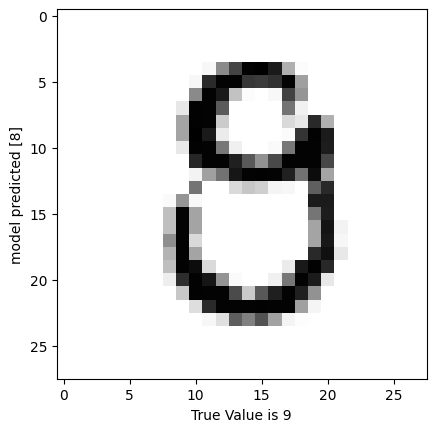

1/1 [==============================] - 0s 22ms/step


KeyboardInterrupt: 

In [12]:
for i in range(60000):
    h=predicter(i,plot=False)
    if h[1]==False:
        predicter(i)
        

LETS START THE MAIN PART 


In [29]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 fc_1 (Dense)                (None, 64)                200768    
                                                      

1/1 [==============================] - 0s 97ms/step


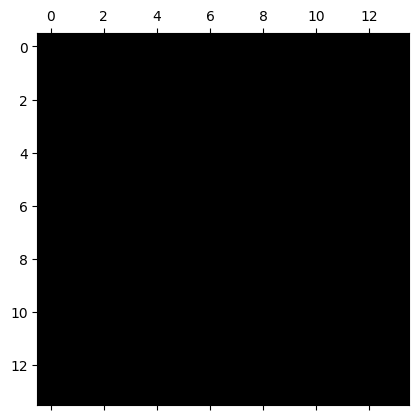

In [31]:
from keras.models import Model

# Original model
original_model = model# Your complete model here

# Choose the layer you want to inspect
layer_name = 'conv_2'  # Replace with the actual layer name

# Create a new model that outputs the activations of the chosen layer
intermediate_layer_model = Model(inputs=original_model.input,
                                 outputs=original_model.get_layer(layer_name).output)
import numpy as np
from keras.preprocessing import image

# Load and preprocess a sample image
i=10
img = np.expand_dims(xtrain[i],axis=0)  # Adjust the target size as needed

# Get activations
activations = intermediate_layer_model.predict(img)
import matplotlib.pyplot as plt

# Choose the index of the filter/neuron you want to visualize
filter_index = 0  # Replace with the index of the neuron you want to visualize

# Get the activations for the specific neuron/filter
filter_activation = activations[0, :, :, filter_index]

# Normalize the activation values
filter_activation -= filter_activation.mean()
filter_activation /= filter_activation.std() + 1e-5
filter_activation *= 0.1

# Clip values to the [0, 1] range
filter_activation = np.clip(filter_activation, 0, 1)

# Plot the heatmap
plt.matshow(filter_activation, cmap='gray')
plt.show() 